In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport # profile report を作る用
from matplotlib_venn import venn2 # venn図を作成する用
%matplotlib inline

In [32]:
out_dir = '../output'
train_df = pd.read_csv('../dataset/train.csv')
test_df = pd.read_csv('../dataset/test.csv')

train_df.genre = train_df.genre.astype('str')
train_df.biggenre = train_df.biggenre.astype('str')
test_df.genre = test_df.genre.astype('str')
test_df.biggenre = test_df.biggenre.astype('str')

In [33]:
type(train_df.biggenre.values[0])

str

In [34]:
train_df.columns

Index(['ncode', 'general_firstup', 'title', 'story', 'keyword', 'userid',
       'writer', 'biggenre', 'genre', 'novel_type', 'end', 'isstop', 'isr15',
       'isbl', 'isgl', 'iszankoku', 'istensei', 'istenni', 'pc_or_k',
       'fav_novel_cnt_bin'],
      dtype='object')

In [35]:
len(train_df.ncode.unique())

40000

In [36]:
train_df.userid

0           9904
1           6527
2          13882
3          13920
4          12136
          ...   
39995    1964264
39996    2180545
39997    2212561
39998     535814
39999    1772298
Name: userid, Length: 40000, dtype: int64

In [40]:

train_report = ProfileReport(train_df, infer_dtypes=True)
path_train_report = 'train_report.html'
# if(not os.path.exists(out_dir + path_train_report)):
train_report.to_file(os.path.join(out_dir, 'train_report.html'))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
test_report = ProfileReport(test_df)
path_test_report = 'test_report.html'
# if(not os.path.exists(out_dir + path_test_report)):
test_report.to_file(os.path.join(out_dir, path_test_report))

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

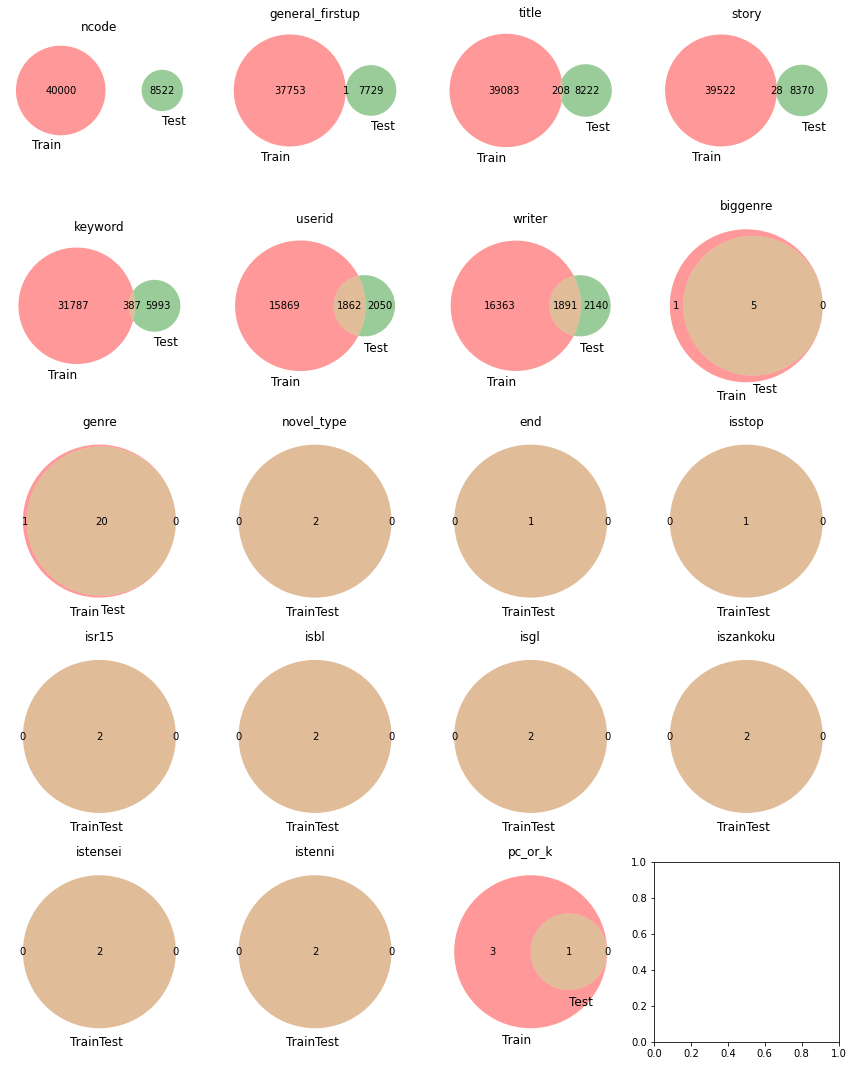

In [19]:

columns = test_df.columns
n_figs = len(columns)
n_cols = 4
n_rows = n_figs // n_cols + 1

fig, axes = plt.subplots(figsize=(n_cols * 3, n_rows * 3), ncols=n_cols, nrows=n_rows)

for c, ax in zip(columns, axes.ravel()):
    venn2(
        subsets=(set(train_df[c].unique()), set(test_df[c].unique())),
        set_labels=('Train', 'Test'),
        ax=ax
    )
    ax.set_title(c)

fig.tight_layout()

In [22]:
display(train_df.pc_or_k.unique())
display(test_df.pc_or_k.unique())

array([0, 3, 2, 1])

array([2])

In [86]:
train_df.groupby('genre').count().ncode

genre
101     1629
102     1575
201     2022
202     2205
301     1943
302     1333
303     2391
304     2405
305     1778
306     2409
307     2108
401     1661
402     2182
403     2356
404     1803
9801    2499
9901    2340
9902    1539
9903    1613
9904     269
9999    1940
Name: ncode, dtype: int64

In [24]:
train_df.query('pc_or_k == 0')

,ncode,general_firstup,title,story,keyword,userid,writer,biggenre,genre,novel_type,end,isstop,isr15,isbl,isgl,iszankoku,istensei,istenni,pc_or_k,fav_novel_cnt_bin
0,N7588B,2007-04-01 16:40:57,暗い窓辺と皇帝の北の宮,※新しく手直ししました。\n\nhttp://ncode.syosetu.com/n2539...,ファンタジー SF 天使 小人 猫,9904,梅田浩志,4,402,1,0,0,0,0,0,0,0,0,0,1
2,N5481C,2007-08-22 18:25:54,海の竜騎兵,海軍の中に存在するクジラ部隊「竜騎兵」 主人公はその一員だ。\n騎乗する鯨との間に結ばれた絆...,ヒーロー 冒険 海軍 深海 海中の戦闘 HJ2021,13882,雨宮雨彦,4,403,1,0,0,0,0,0,0,0,0,0,3


<Figure size 1440x720 with 0 Axes>

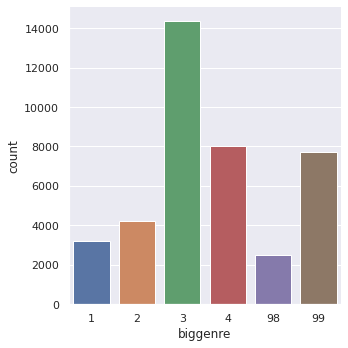

In [6]:
plt.figure(figsize=(20,10))
sns.set(font_scale = 1)
sns.catplot(x='biggenre',data=train_df,kind="count")

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


/home/wsato/work/venv/lib/python3.8/site-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)
/home/wsato/work/venv/lib/python3.8/site-packages/seaborn/categorical.py:3775: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try countplot
  warnings.warn(msg, UserWarning)


<Figure size 1440x720 with 0 Axes>

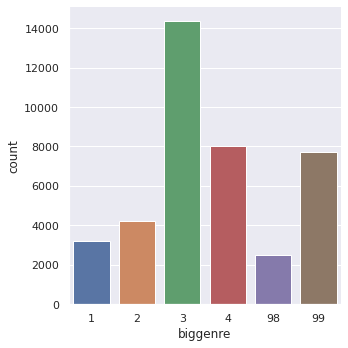

<Figure size 1440x720 with 0 Axes>

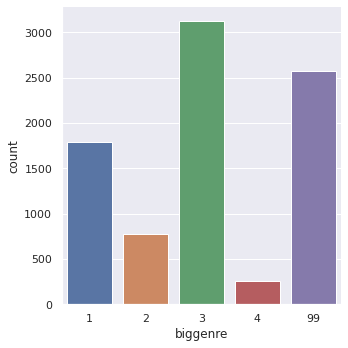

In [17]:
for i in [train_df,test_df]:
    plt.figure(figsize=(20,10))
    sns.set(font_scale = 1)
    sns.catplot(x='biggenre',data=i,kind="count",ax=ax)

<Figure size 144x288 with 0 Axes>

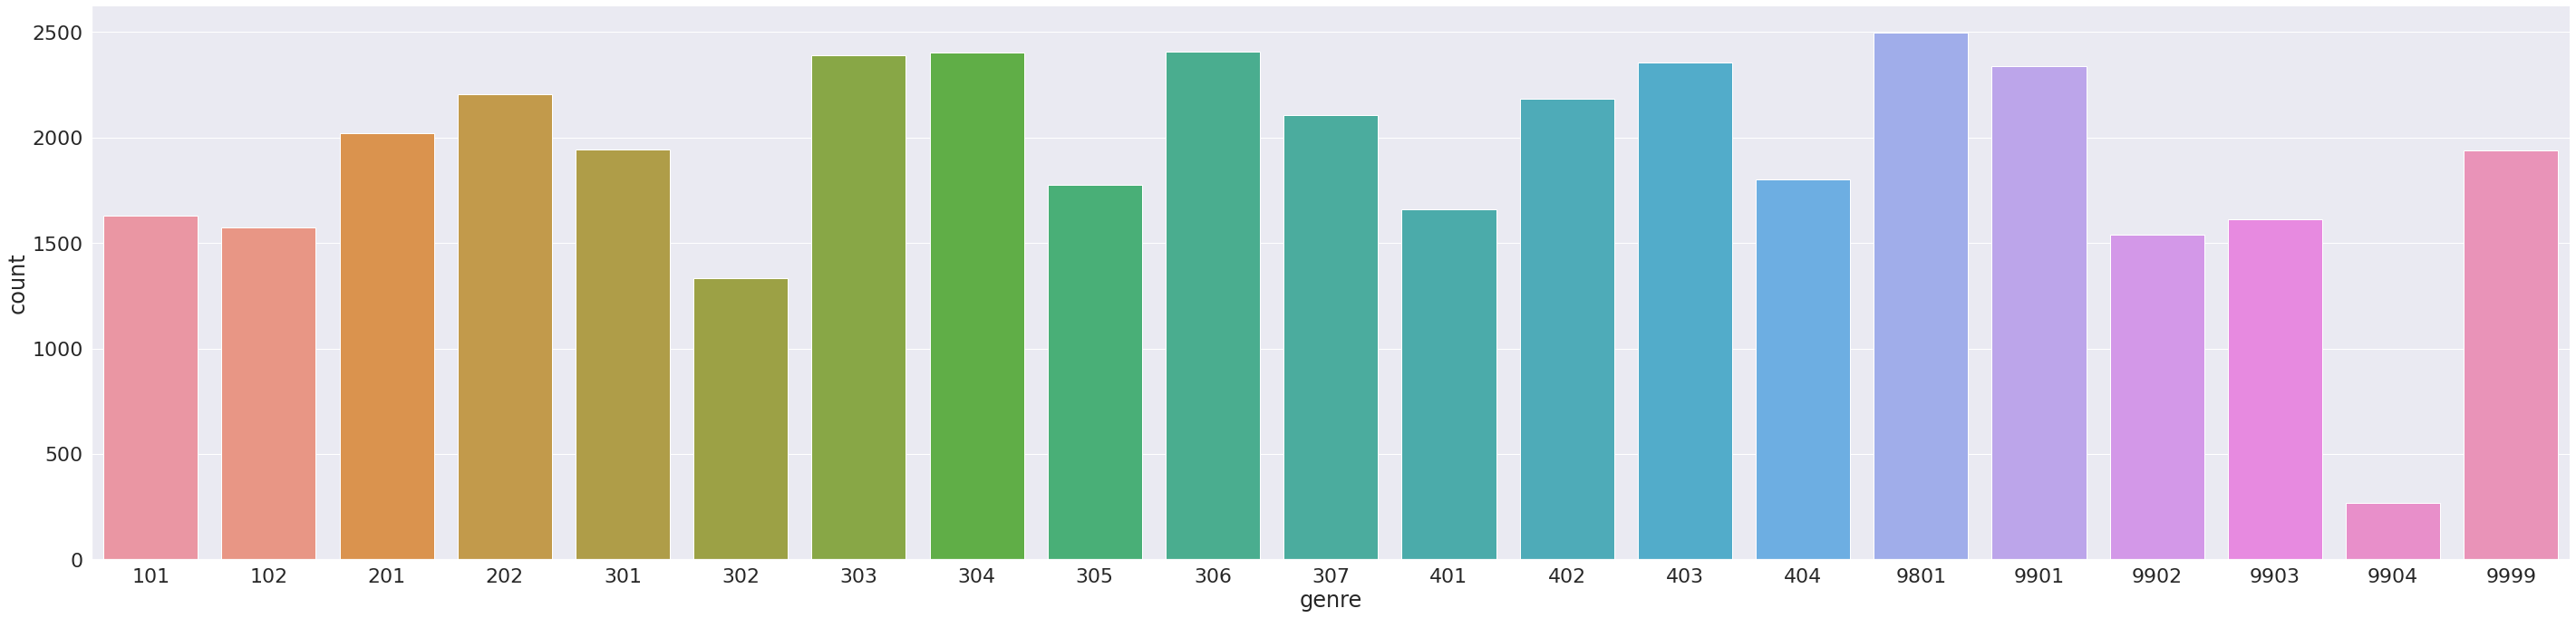

In [59]:
plt.figure(figsize=(2,4))
sns.set(font_scale = 2)
sns.catplot(x='genre',data=train_df,kind="count", height=10, aspect=4, order=sorted(train_df.genre.unique()))

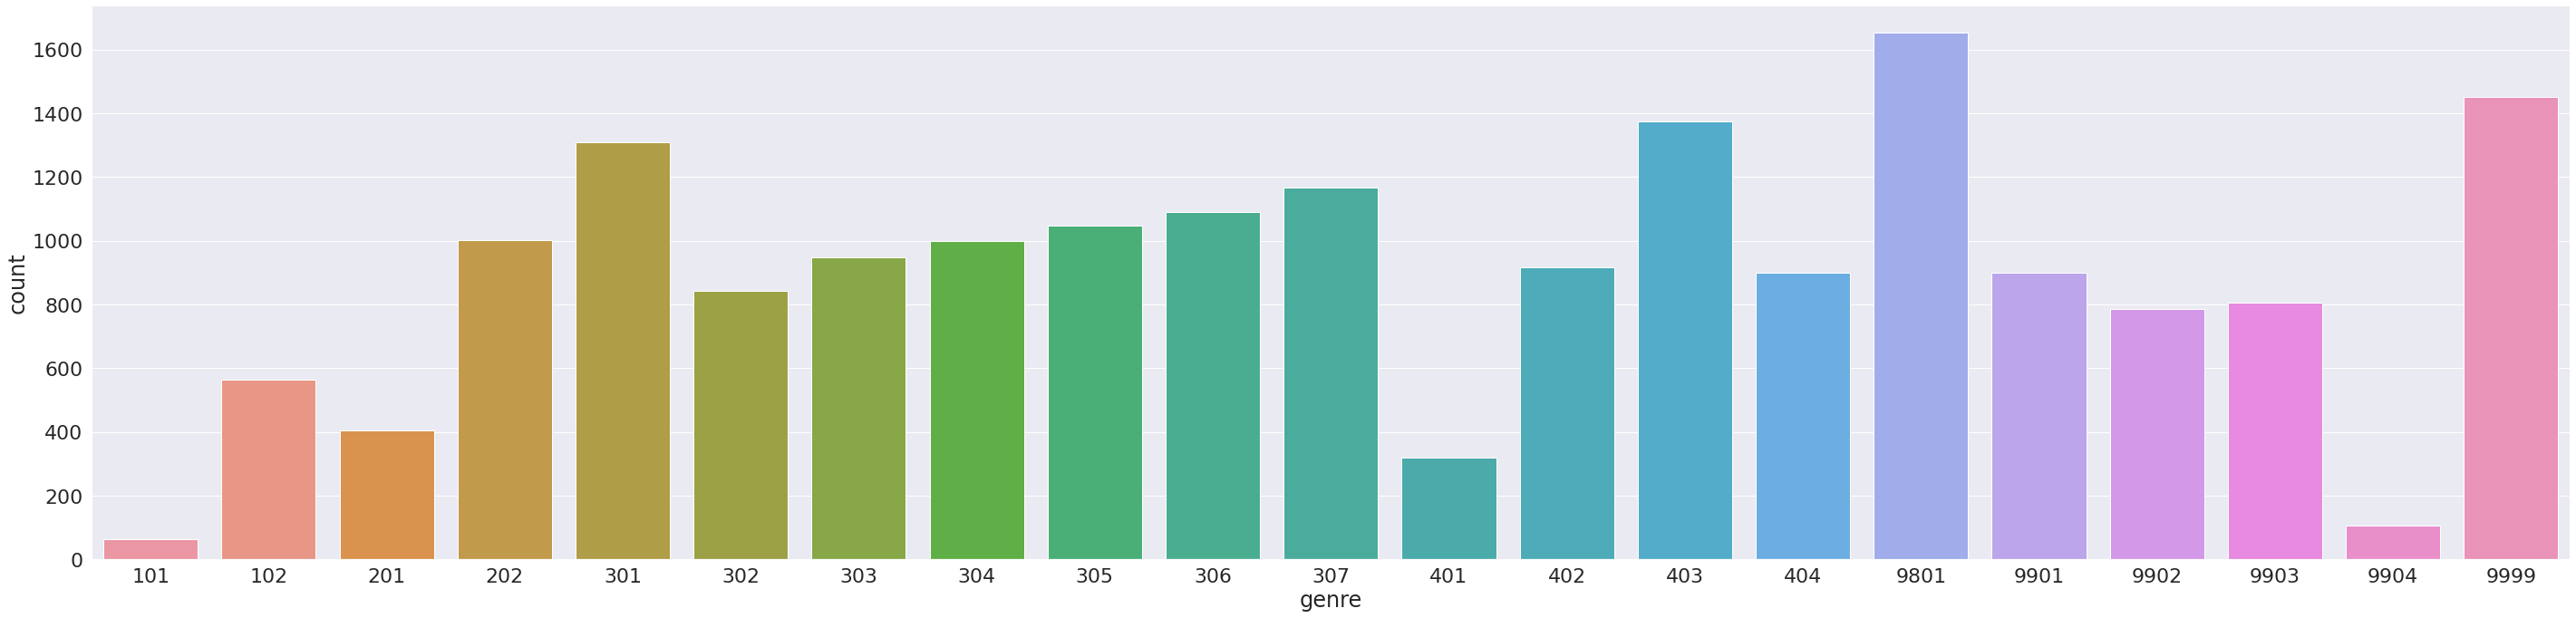

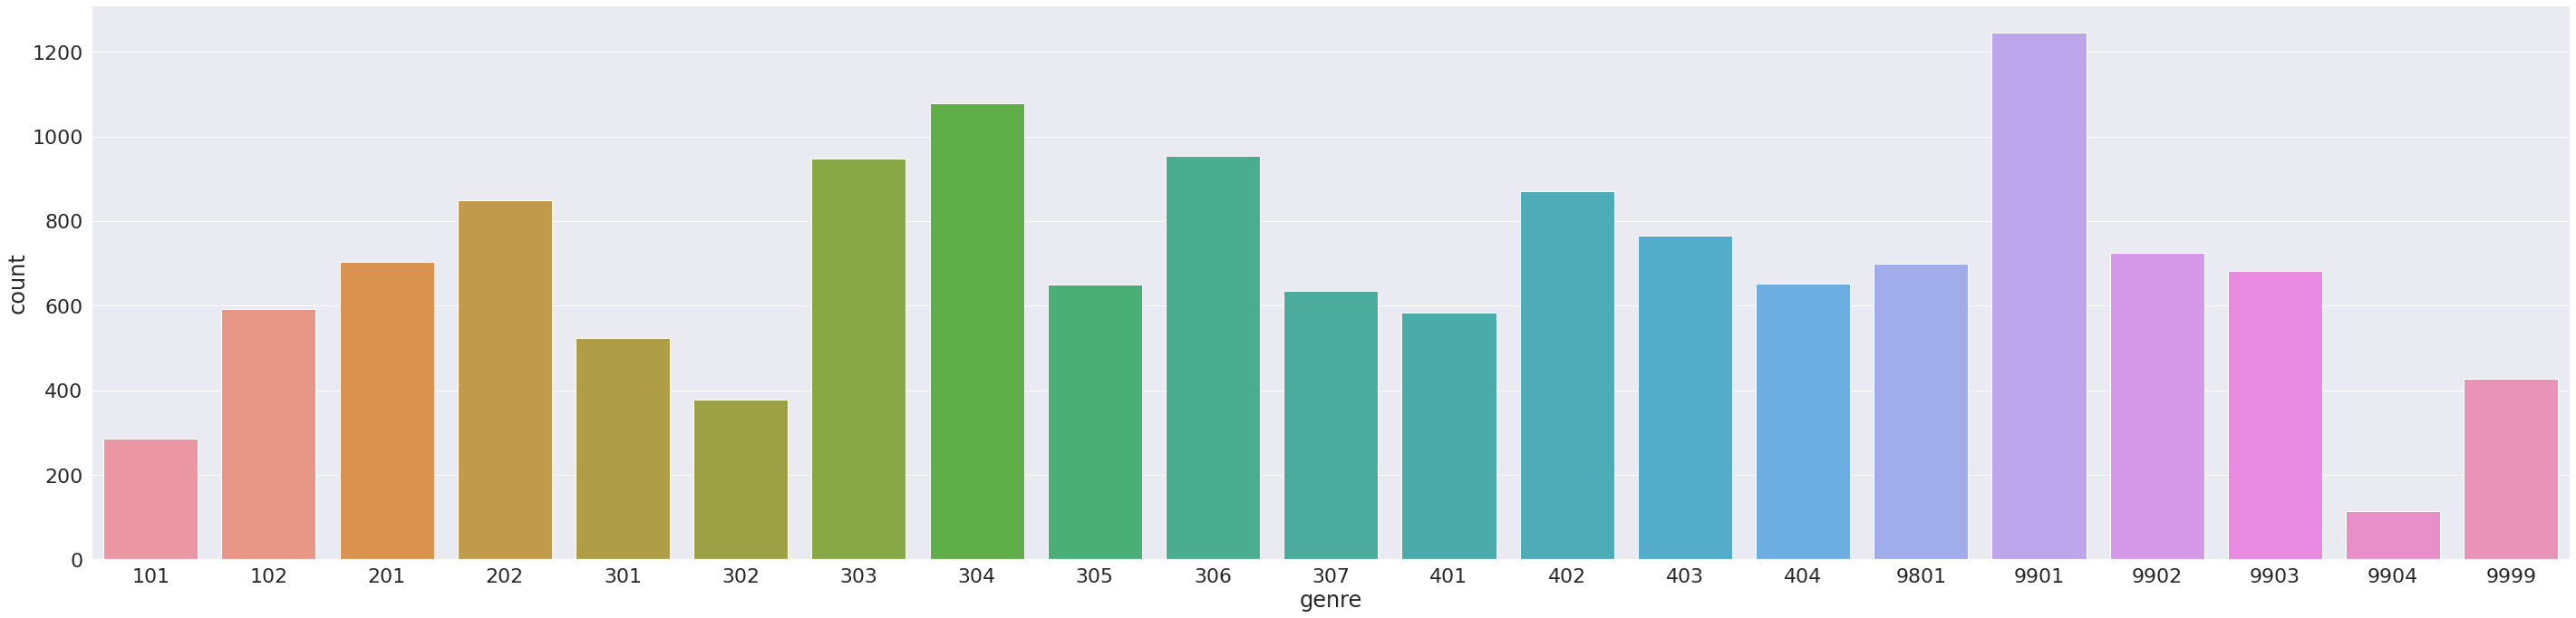

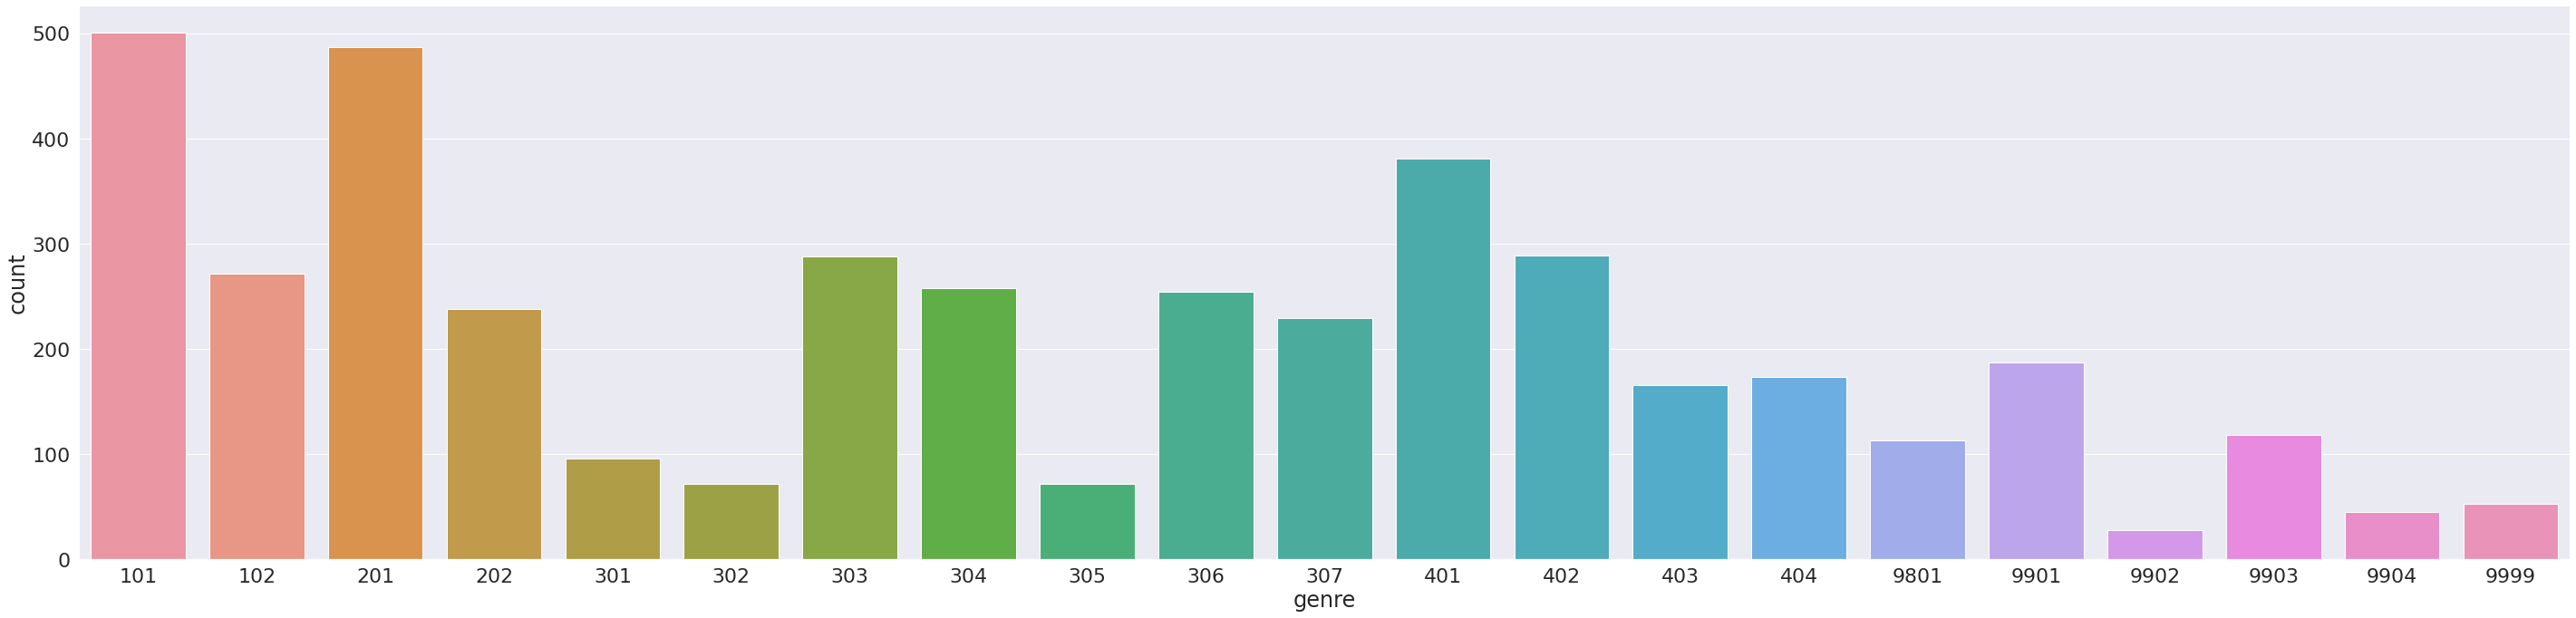

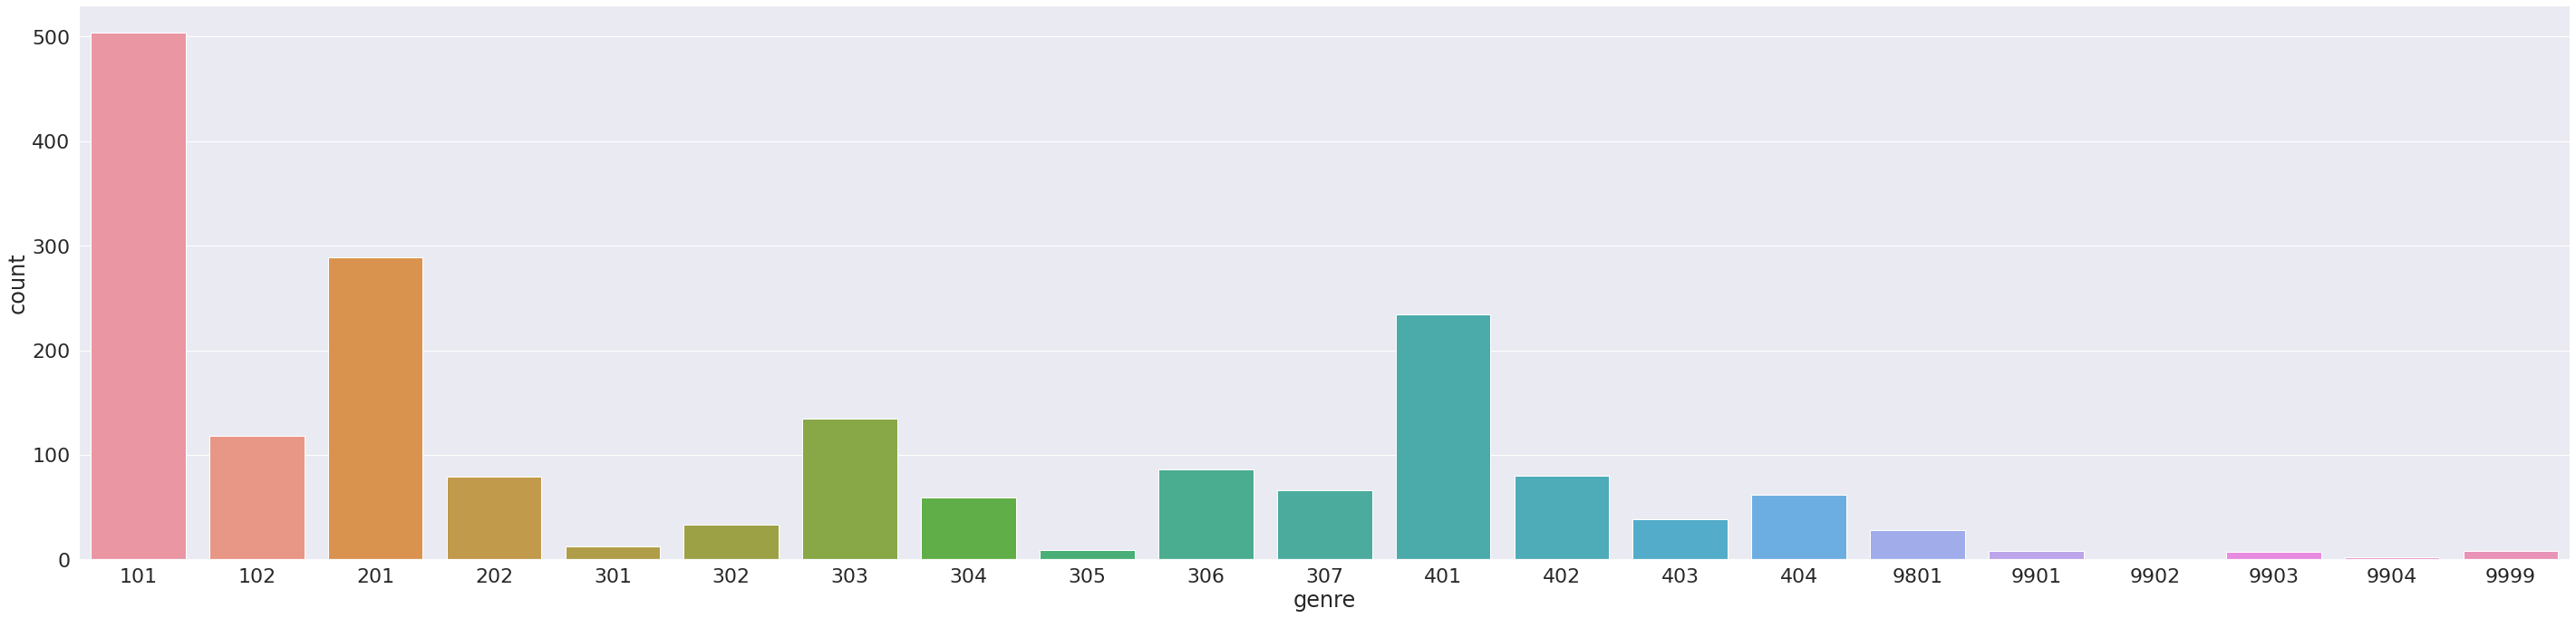

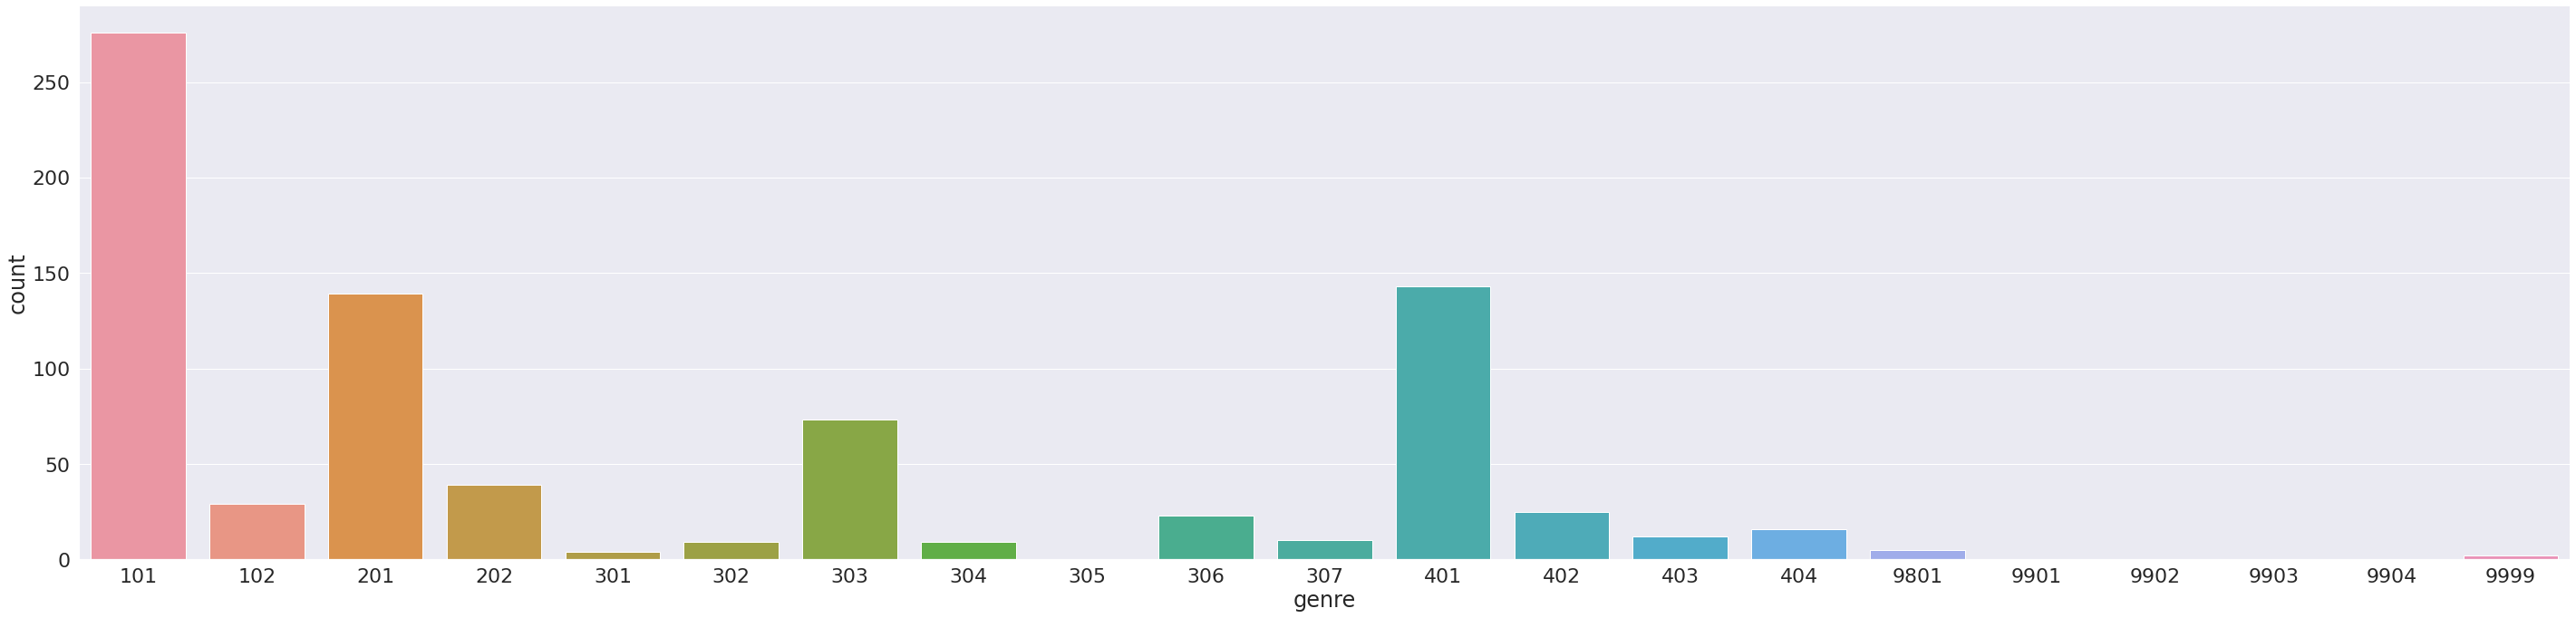

In [82]:
favs = train_df.fav_novel_cnt_bin.unique()
sns.set(font_scale = 2)
# fig, axes = plt.subplots(figsize=(40,20), ncols=1, nrows=len(favs))
for fav, ax in zip(sorted(favs), axes):
    s = sns.catplot(x='genre',data=train_df.query('fav_novel_cnt_bin == @fav'),kind="count", height=10, aspect=4, legend=fav, order=sorted(train_df.genre.unique()))
    s.set_titles("{fav}")
#     s.set(ylim=(0,ylim))
    